# PHY224 Circuits : Lightbulb

## Student Information
- Student Name: Percival Francis
- Partner Name: Justin Nicholson
- TA Name: Shaun

## Upload data files
Upload your data file (.csv file) that contains the data you measured and used in the experiment

## Question 1
Write the python code in the next box to load any needed data, fit models to the data, perform any additional calculations, and create the required plots. If you work in a Jupyter notebook you should submit include a PDF rendering of the notebook so that it can be graded. If you work in a Python text file (e.g. in Spyder or VS Code) you should upload the Python file separately to the figures and captions, and use the word file to attach figures and write captions.

In [276]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Measured Resistance of the Resistor using an Ohmmeter:

In [277]:
MEASURED_RESISTANCE = 67.38 # in ohms
MEASURED_ERROR = 1.3976 # in ohms

Values from CSV file:

In [278]:
lightbulb_data = np.loadtxt("./data/lightbulb_data.csv", delimiter=',', comments='#', unpack=True, skiprows=2) # retrieve from csv.
voltage_data = lightbulb_data[0] # potential difference
ampere_data = lightbulb_data[1] # current
ohm_data = lightbulb_data[4] # resistance

voltage_error = lightbulb_data[2] # potential difference error
ampere_error = lightbulb_data[3] # current error
ohm_error = lightbulb_data[5] # resistance error

### Functions

Equation for Chi Squared Reduced:\
$\chi^2_r$ is calculated with this formula:
$$\chi^{2}_{r} = \frac{1}{v}\sum_{i=1}^{N} \left(\frac{y_i - f(x_i)}{u(x_i)}\right)^2$$

In [279]:
# function for calculating chi squared reduced.
def chi_squared_reduced(y_measure, y_predict, errors, number_of_parameters):
    """Calculates the reduced chi squared of data, prediction and errors."""
    return (np.sum(((y_measure - y_predict) ** 2 )/ (errors ** 2)))/(y_measure.size - number_of_parameters)


### Model Functions

Equation for power law
$$f(V) = aV^b + c$$

Equation for logarithmic
$$\log{(f(V))} = log{(a)} + b\log{(V)}$$

Equation for idealized
$$f(V) = aV^{\frac{3}{5}}$$

In [280]:
# function for power law model
def power_law(V, a, b, c):
    return a * (V ** b) + c

In [281]:
# function for power law model
# V given to this equation should be ln(V)
def logarithmic(V, a, b):
    return np.log(a) + b * np.log(V)

In [282]:
def idealized(V, a):
    return a * V ** (0.6)

Curve Fit

In [283]:
# curve fit of power law using curve_fit
popt, pcov = curve_fit(power_law, xdata=voltage_data, ydata=ampere_data, absolute_sigma=True, sigma = voltage_error)
pstd = np.sqrt(np.diag(pcov))
pstd

array([0.00425197, 0.43864655, 0.00596391])

In [284]:
# curve fit of logarithmic using curve_fit
poptl, pcovl = curve_fit(power_law, xdata=voltage_data, ydata=ampere_data, absolute_sigma=True, sigma = voltage_error/voltage_data)
pstdl = np.sqrt(np.diag(pcov))
pstdl

array([0.00425197, 0.43864655, 0.00596391])

In [285]:
# curve fit of idealized using curve_fit
popti, pcovi = curve_fit(idealized, xdata=voltage_data, ydata=ampere_data, absolute_sigma=True, sigma = voltage_error)
pstdi = np.sqrt(np.diag(pcov))
pstdi

array([0.00425197, 0.43864655, 0.00596391])

Other parameters

Power Law

In [286]:
print("chi squared reduced =",chi_squared_reduced(ampere_data, power_law(voltage_data, popt[0], popt[1], popt[2]), voltage_error, len(popt)))
print(f"Values of: \na: {popt[0]}, \nb: {popt[1]}, \nc: {popt[2]}")
pvar = np.diag(pcov)
print(f"Uncertainty in: \na: {np.sqrt(pvar[0])}, \nb: {pvar[1]},\nc: {pvar[2]}")
# notice that b is approx 3/4, off from 3/5

chi squared reduced = 0.0005424040796750286
Values of: 
a: 0.0030536390138963727, 
b: 0.746010231583908, 
c: 0.0041927753539521126
Uncertainty in: 
a: 0.004251972260860279, 
b: 0.19241079420628884,
c: 3.5568215904609135e-05


Logarithmic

In [287]:
print("chi squared reduced =",chi_squared_reduced(np.log(ampere_data), logarithmic(voltage_data, poptl[0], poptl[1]) + 0.003, voltage_error/voltage_data, len(popt)))
print(f"Values of: \na: {np.log(poptl[0])}, \nb: {poptl[1]}")
pvarl = np.diag(pcov)
print(f"Uncertainty in: \na: {np.sqrt(pvarl[0])}, \nb: {pvarl[1]}")


chi squared reduced = 51840.82356590182
Values of: 
a: -5.56430621086385, 
b: 0.6815474661706672
Uncertainty in: 
a: 0.004251972260860279, 
b: 0.19241079420628884


Idealized

In [288]:
print("chi squared reduced =",chi_squared_reduced(ampere_data, idealized(voltage_data, popti[0]), voltage_error, len(popti)))
print(f"Values of: \na: {popti[0]}")
pvari = np.diag(pcovi)
print(f"Uncertainty in: \na: {np.sqrt(pvari[0])}")
# notice that b is approx 3/4, off from 3/5

chi squared reduced = 0.03833698446522124
Values of: 
a: 0.005484871070694499
Uncertainty in: 
a: 0.0004117784230693048


## Question 2
Plot the fit to the lightbulb data with linear axes.  In the next question you'll add a caption for this figure.
(if you made one file with multiple plots, it's easiest to upload the same file to both questions so that we don't miss anything when grading)


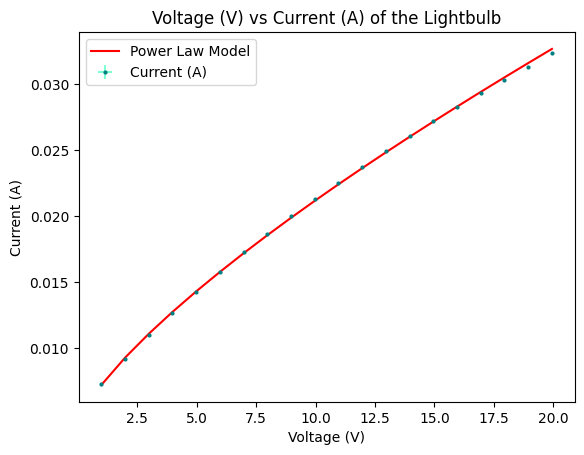

In [289]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Current (A)')

plt.plot(voltage_data, power_law(voltage_data, popt[0], popt[1], popt[2]), label = "Power Law Model", color='red')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

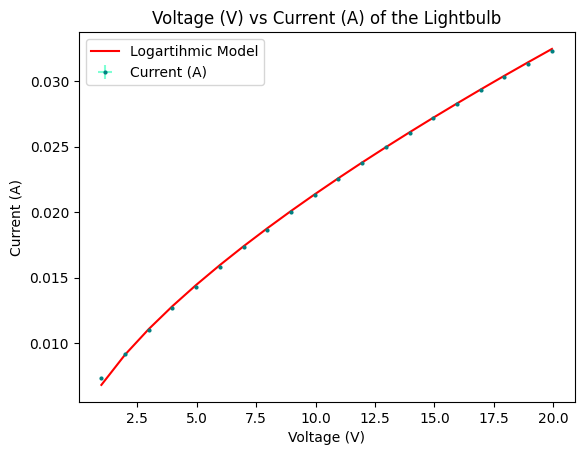

In [290]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Current (A)')

plt.plot(voltage_data, np.exp(logarithmic(voltage_data, poptl[0], poptl[1])) + 0.003, label = "Logartihmic Model", color='red')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

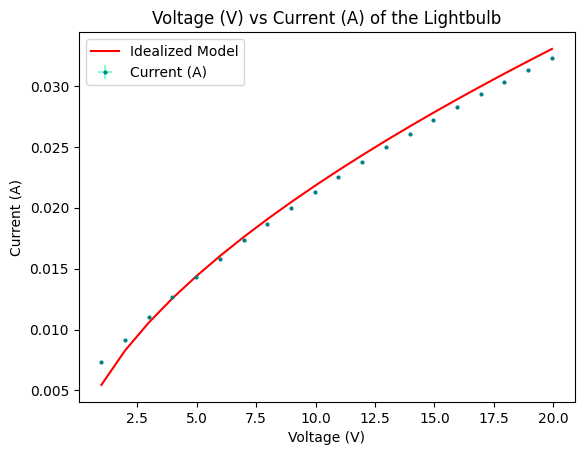

In [291]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Current (A)')

plt.plot(voltage_data, idealized(voltage_data, popti[0]), label = "Idealized Model", color='red')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

Note: Error bars are too small to be seen

## Question 3

Write a suitable caption that describes the plot. You should include the meaning of each point or line on your plot, any quantities requested (exponent with uncertainty) with appropriate units. Include the regression coefficients.

A caption needs to explain what’s in the plot and how it relates the data and models. A person with some background in your experiment should be able to read the caption and understand the figure without needing critical information from somewhere else.

In [292]:
#CAPTION

The graphs are for the following fits:

Power law:
$$f(V) = aV^b + c$$

$$\chi^2_r = 0.0005424040796750286$$

Logarithmic:
$$\log{(f(V))} = log{(a)} + b\log{(V)}$$

$$\chi^2_r = 51840.82356590182$$


Idealized:
$$f(V) = aV^{\frac{3}{5}}$$

$$\chi^2_r = 0.03833698446522124$$

The values of each individual fit parameter are shown in question 7, I will not show them here to save space.


These 3 plots describe a curve fit using the three models above: Power Law, Logarithmic, and Idealized. The power law is the expected relationship of this system, while the logarithmic model allows the data to be curve fit using a linear model. The Idealized model is what is to be expected in a perfectly ideal situation.

The x-axis shows the voltages chosen to test in the lab, the y-axis shows the ampere values measured through the lightbulb.

The data was obtained from `lightbulb_data.csv` which was gathered during the lab.

The $\chi^2_r$ of the three plots show that none of the curves are good fits: Power law and Idealized were overfit, while Logarithmic is not respective of what the data is trying to convey.

A more in-depth analysis of the data is shown below:

We have plotted our experimental data into three graphs: A Power Law Model, a Logarithmic Model, and an Idealized Model. Through doing so, we are able to represent the relationship between voltage and current in our filament light bulb circuit, through plotting our recorded data at various measurement points. The Power Law Model is used to view how the relationship between resistance and temperature change. We find that as voltage increases, current increases as well, nonlinearly. This indicates a non-Ohmic system, which was expected as the filament lightbulbs create excess heat- altering the flow of current. The Logarithmic Model helps represent the relationship between voltage and current where decreasing current corresponds to increasing voltage. In our representation, we see a gradual flattening of the curve as voltage increases- the current increases at decreasing rates. This may imply a larger scale of data collected; the current would approach a limit as voltage increases linearly. The Idealized Model is utilized to determine if our data can represent a theoretical I ∝ V representation. What we see in this model is that overall, the effects of the filament lightbulb, creating excess heat as voltage increases, increases resistance. We may be able to conclude that the non-Ohmic behavior of the bulbs indicates a relationship that the resistance of the bulb corresponds to the temperature of the bulb. Indicating the theoretical perfect relationships between current, voltage, resistance deviate in real world electric systems that produce imperfect excess energy dissipation effects.

## Question 4
Plot the fit to the lightbulb data with logarithmic axes. In the next question you'll add a caption for this figure. 

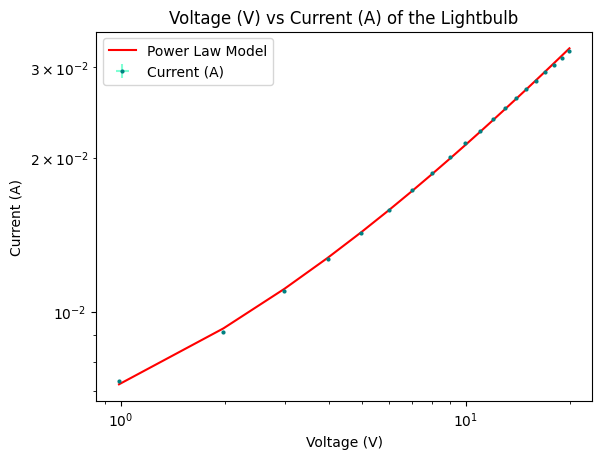

In [293]:
# logarithmic version
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Current (A)')

plt.plot(voltage_data, power_law(voltage_data, popt[0], popt[1], popt[2]), label = "Power Law Model", color='red')

# set to log scale
plt.xscale('log')
plt.yscale('log')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

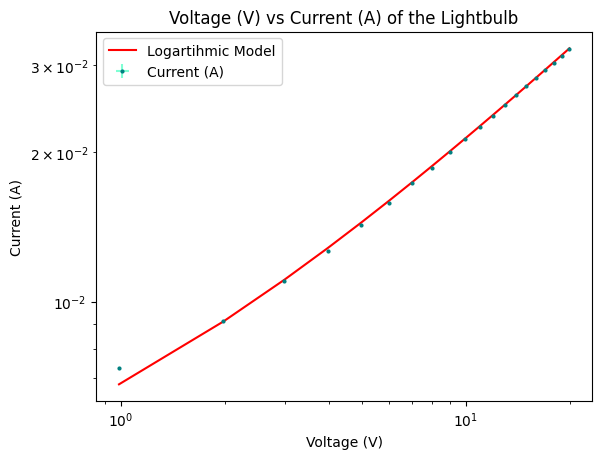

In [294]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Current (A)')

plt.plot(voltage_data, np.exp(logarithmic(voltage_data, poptl[0], poptl[1])) + 0.003, label = "Logartihmic Model", color='red')

# set to log scale
plt.xscale('log')
plt.yscale('log')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

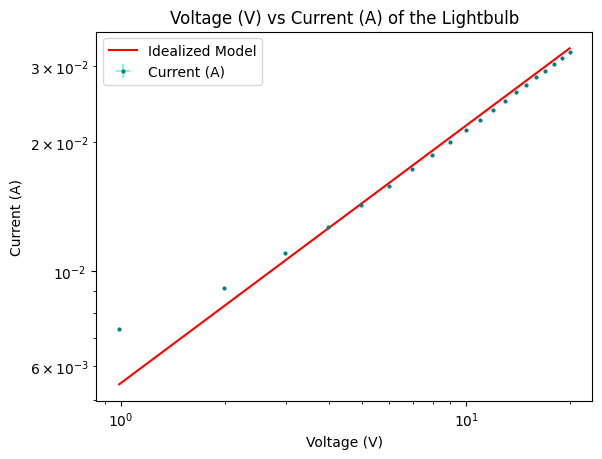

In [295]:
plt.errorbar(x = voltage_data, y = ampere_data, xerr=voltage_error, yerr=ampere_error, fmt= 'o',
               ms=2, color='teal', ecolor='aquamarine', label='Current (A)')

plt.plot(voltage_data, idealized(voltage_data, popti[0]), label = "Idealized Model", color='red')

# set to log scale
plt.xscale('log')
plt.yscale('log')

# Legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Voltage (V) vs Current (A) of the Lightbulb')

plt.show()

## Question 5
Write a suitable caption that describes the plot. You should include the meaning of each point or line on your plot, any quantities requested (exponent with uncertainty) with appropriate units. Include the regression coefficients.

A caption needs to explain what’s in the plot and how it relates the data and models. A person with some background in your experiment should be able to read the caption and understand the figure without needing critical information from somewhere else.

In [296]:
#CAPTION

The graphs are for the following fits:

Power law:
$$f(V) = aV^b + c$$

$$\chi^2_r = 0.0005424040796750286$$

Logarithmic:
$$\log{(f(V))} = log{(a)} + b\log{(V)}$$

$$\chi^2_r = 51840.82356590182$$


Idealized:
$$f(V) = aV^{\frac{3}{5}}$$

$$\chi^2_r = 0.03833698446522124$$

The values of each individual fit parameter are shown in question 7, I will not show them here to save space.

These graphs are identical to Question 4, except they are plotted on a logarithmic scale, to make relationships more apparent.
These 3 plots describe a curve fit using the three models above: Power Law, Logarithmic, and Idealized. The power law is the expected relationship of this system, while the logarithmic model allows the data to be curve fit using a linear model. The Idealized model is what is to be expected in a perfectly ideal situation.

The x-axis shows the voltages chosen to test in the lab, the y-axis shows the ampere values measured through the lightbulb.

The data was obtained from `lightbulb_data.csv` which was gathered during the lab.

The $\chi^2_r$ of the three plots show that none of the curves are good fits: Power law and Idealized were overfit, while Logarithmic is not respective of what the data is trying to convey.

A more in-depth analysis of the data is shown below:

In the previous question, once again plotting our data into three graphs: a Power Law Model, a Logarithmic Model, and an Idealized Model. Unlike in Question 2, where our data was plotted in a more linear fashion, in question 4, we have plotted our data in logarithmic fashion. Immediately what we see is our data produces more linear visual representations in resistance of the filament bulb system. The Power Law fitted model is again utilized to help visualize whether current and voltage are proportional to resistance and temperature change of the filament bulb. When plotted in logarithmic scale increments, we find that as voltage increases, current increases as well in a more linear fashion than when plotted in linear scale increments. The plotting does not indicate a perfect linear representation between current, voltage, and resistance, but the slope of the curve is more constant. Unlike the interpretations made from the Power Law plotting in Question 2, this indicates more Ohmic behaviors of the system. The Logarithmic fitted model in Question 4 also utilized a logarithmic scale unlike in Question 2. When plotted this way, we again see a more linear representation of our data where resistance increases more proportionally. Though more ideal, the relationship is not logarithmic. In the Idealized fitted model we see a slope fitted to an ideal increment of resistance. If I ∝ V were proportional. Our data does not fit the straight-line representation perfectly. This again indicates an imperfect system. Overall, we see that while plotting with logarithmic scales produces more proportional relationships, we do not have a perfect Power Law system. This still indicates resistance changes with temperature of the filament bulb- though linearly when fitted with logarithmic scale axes, and this increase in temperature relates upward trends with an increase in resistance. Through these plots, we see the Power Law model best represents this non-Ohmic ideal energy dissipating filament lightbulb system.

## Question 6
Plot the residual plot of your model fit. In the next question you will add a caption for this figure. 


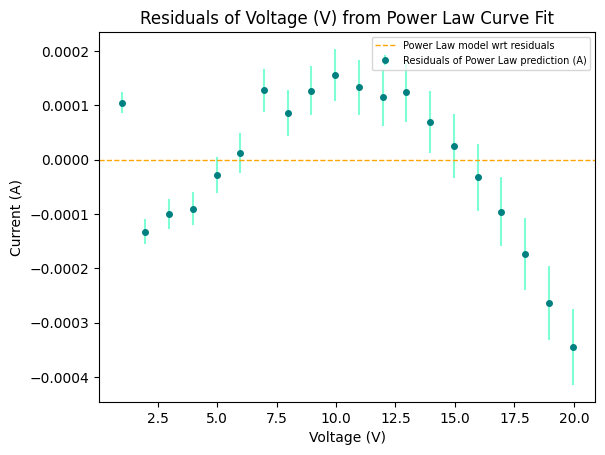

In [297]:
#PLOT

# residuals
residuals = ampere_data - power_law(voltage_data, popt[0], popt[1], popt[2])


plt.errorbar(x = voltage_data, y = residuals, yerr = ampere_error, fmt= 'o', ms=4, label='Residuals of Power Law prediction (A)',ls='', color='teal', ecolor='aquamarine')
plt.axhline(y=0, color='orange', linestyle='--', linewidth=1, label='Power Law model wrt residuals') 

# legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Residuals of Voltage (V) from Power Law Curve Fit')
plt.legend(fontsize=7)
plt.show()

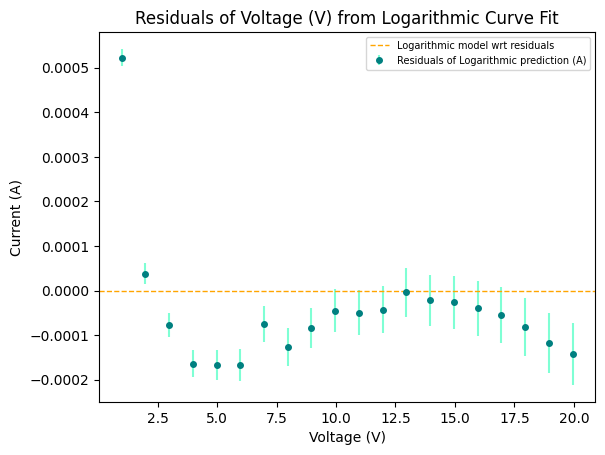

In [298]:
# residuals
residuals = ampere_data - (np.exp(logarithmic(voltage_data, poptl[0], poptl[1])) + 0.003)


plt.errorbar(x = voltage_data, y = residuals, yerr = ampere_error, fmt= 'o', ms=4, label='Residuals of Logarithmic prediction (A)',ls='', color='teal', ecolor='aquamarine')
plt.axhline(y=0, color='orange', linestyle='--', linewidth=1, label='Logarithmic model wrt residuals') 

# legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Residuals of Voltage (V) from Logarithmic Curve Fit')
plt.legend(fontsize=7)
plt.show()

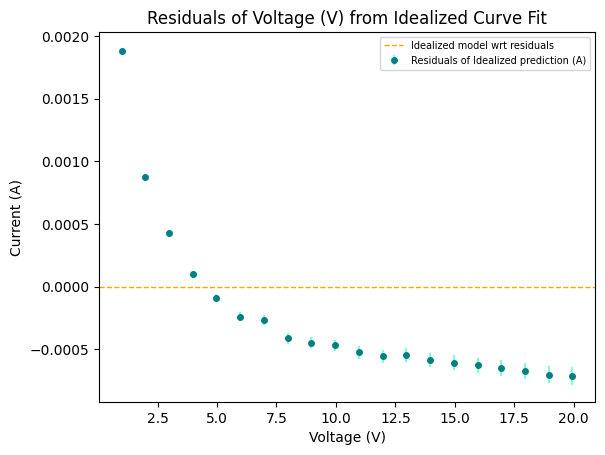

In [299]:
# residuals
residuals = ampere_data - idealized(voltage_data, popti[0])


plt.errorbar(x = voltage_data, y = residuals, yerr = ampere_error, fmt= 'o', ms=4, label='Residuals of Idealized prediction (A)',ls='', color='teal', ecolor='aquamarine')
plt.axhline(y=0, color='orange', linestyle='--', linewidth=1, label='Idealized model wrt residuals') 

# legend and titles
plt.legend()
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.title('Residuals of Voltage (V) from Idealized Curve Fit')
plt.legend(fontsize=7)
plt.show()

## Question 7
Write a suitable caption that describes the plot. You should include a source for the dataset (it might be in the file you used), the meaning of each point or line on your plot, any quantities requested (mean, standard deviation) with appropriate units. Include the chi-square value in the caption for this plot.

The graphs are for the following fits:\
Note that V is voltage for all three graphs. Other units are in (brackets).

Power law:
$$f(V) = aV^b + c$$

Values:
- a: 0.0030536390138963727 (A/V), 
- b: 0.746010231583908 (unitless), 
- c: 0.0041927753539521126 (A)

Uncertainties:
- a: 0.004 (A/V),
- b: 0.2 (unitless),
- c: 4e-05 (A)

Chi Squared Reduced:

$\chi^2_r = 0.0005424040796750286$

Logarithmic:
$$\log{(f(V))} = log{(a)} + b\log{(V)}$$

Values:
- a: -5.56430621086385 (A), 
- b: 0.6815474661706672 (A/V)

Uncertainties:
- a: 0.004 (A),
- b: 0.2 (A)

Chi Squared Reduced:

$\chi^2_r = 51840.82356590182$


Idealized:
$$f(V) = aV^{\frac{3}{5}}$$

Values:
- a: 0.005484871070694499 (A/V)

Uncertainties:
- a: 0.0004 (A/V)

Chi Squared Reduced:

$\chi^2_r = 0.03833698446522124$



These 3 plots describe the residuals from the following models: Power Law, Logarithmic, and Idealized. The power law is the expected relationship of this system, while the logarithmic model allows the data to be curve fit using a linear model. The Idealized model is what is to be expected in a perfectly ideal situation.

The x-axis shows the voltages chosen to test in the lab, the y-axis shows the ampere residuals of the values measured through the lightbulb.
The dotted orange line shows how the residuals are placed with respect to the curve fit function.

The data was obtained from `lightbulb_data.csv` which was gathered during the lab.

The $\chi^2_r$ of the three plots show that none of the curves are good fits: Power law and Idealized were overfit, while Logarithmic is not respective of what the data is trying to convey.

The fit parameters have large uncertainties compared to the actual parameter values, this also shows that the models do not fit well.

A more in-depth analysis of the data is shown below:

In Question 6 we entered our data into three voltage residual plot models: curve fitted by the Power Law, curve fitted by Logarithmically, and curve fitted Idealistically. What we are trying to observe is whether the residuals (y-axis) indicate a difference between the actual measured current through the filament bulb system and the ideal- indicated by a more horizontally linear near zero visual representation. Through plotting our data onto these three graphs, we find that the Power Law fit indicates the estimations of current were too low within the 7.5V to 15V range and too high outside of those voltage ranges. What we can conclude from this is that there is no linear relationship- further relating to our non-Ohmic observations previously observed. What we notice in the Logarithmic fitted graph are mostly overestimations of current through the system over 2.5V. Under that limit, we find extreme underestimations of the current. This appears to inform us less about the behavior of the current through the system than the Power Law fit. The Idealized fit curve produces a visual similar to an exponential decay function, beginning with large underestimations towards consistent overestimations at a certain limit. This square law model appears to be more useful at non-zero low voltage ranges but over predicts as voltage increases. Perhaps the consistency of the overestimation limit that the model produces can provide more indicators about its inefficiency than the Logarithmic model. In conclusion, it appears that the Power Law fitted model allows us to best see the non-linear nature of our data collected. The non-linear representation best matches our observable findings that as resistance increases, heat increases, and the filament bulb system behaves non-Ohmic ideally.

## Question 8
Add any other details you think are important after this point.

In [300]:
#Appendix

Through our various plots, the Power Law models best indicate the relationship and behaviors between voltage and current at various increments in the filament light bulb circuit system. As seen through these representations, the Logarithmic model proves inconsistent with large underrepresentation and consistent overrepresentation at progressing various ranges. The Idealistic square model predicts as voltage increases. The Power Law representation best demonstrates the nonlinear representation through the general curve shape of the plot, as while it is not perfect, it provides both over and underestimation of current values unlike the more lopsided other models. This is best indicated when considering the LED filament bulb should produce an overestimated value initially, as the temperature of the bulb is increasing as voltage increases, and time continues. At lower voltages, the resistance and temperature are lower- based on the observations collected throughout this experiment.

The source of the data is found in the file `lightbulb_data.csv` located in `/resistor_lightbulb/data/lightbulb_data.csv`.